# Feature Detection, Extraction and Matching

### 1 : Harris Corner Detector using OpenCV


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
img=cv2.imread('exit-ramp.jpg')
img_cp=np.copy(img)
img_cp=cv2.cvtColor(img_cp,cv2.COLOR_BGR2RGB)

In [7]:
img_g=cv2.cvtColor(img_cp,cv2.COLOR_BGR2GRAY)

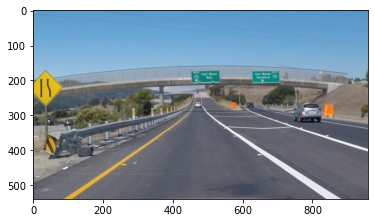

In [8]:
#cv2.imshow('image',img_g)
plt.imshow(img_cp)

In [9]:
img_g=np.float32(img_g)
block_size=2 #neighborhood consider for corner detection
ksize=3 # apperture size for sobel derivatives
k_=0.04 # harris detector free parameters in the equations
dst=cv2.cornerHarris(img_g,block_size,ksize,k_)

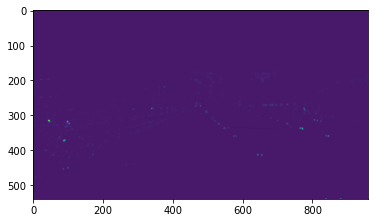

In [10]:
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
plt.imshow(dst)

In [11]:
# Threshold for an optimal value, it may vary depending on the image.
img_cp[dst>0.01*dst.max()]=[0,0,255]

In [12]:
cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff==27:
    cv2.destroyAllWindows()

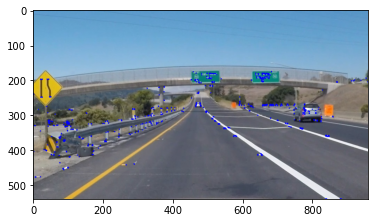

In [13]:
import matplotlib.pyplot as plt
plt.imshow(img_cp)

### SIFT (Scale Invariant Feature Transform)
SIFT is both Rotation as well as scale invariance. This algorithm provides both keypoints and descriptors (Which describes the keypoint neighborhoods).

In [14]:
img_sift=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

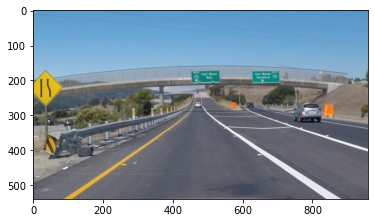

In [15]:
plt.imshow(img_sift)

In [16]:
img_sift_g=cv2.cvtColor(img_sift,cv2.COLOR_RGB2GRAY)

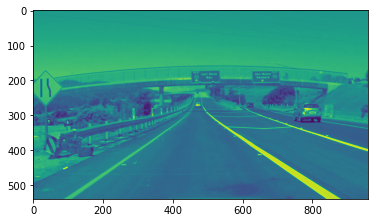

In [17]:
plt.imshow(img_sift_g)

In [18]:
import cv2 as cv
sift=cv.SIFT_create()
#here kp is the list of keypoints and des is numpy array of Number_of_keypoints*128
kp,des=sift.detectAndCompute(img_sift_g,None)

In [26]:
print(len(kp))
print(des.shape)

1648
(1648, 128)


In [27]:
img_draw=cv2.drawKeypoints(img_sift_g,kp,None,color=(255,0,0))

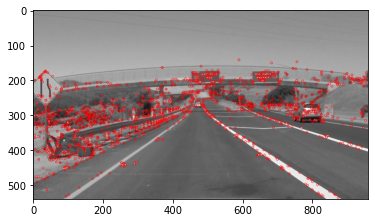

In [32]:
img_draw=cv2.cvtColor(img_draw,cv2.COLOR_BGR2RGB)
plt.imshow(img_draw)

### Shi- Tomasi Corner detection 

In [10]:
import cv2 
import numpy 

In [12]:
img=cv2.imread('exit_ramp.jpg',0)
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [13]:
points=(cv2.goodFeaturesToTrack(gray_img,maxCorners=50,qualityLevel=0.02,minDistance=20)

SyntaxError: unexpected EOF while parsing (<ipython-input-13-ee47a1472c7b>, line 1)

In [ ]:
points=np.float(points)

### SURF (Speeded Up Robust Features)

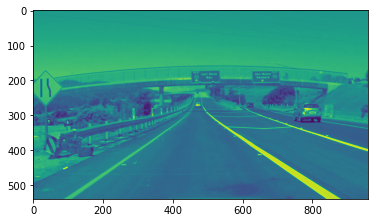

In [40]:
img_surf=cv2.imread('exit-ramp.jpg')
img_surf2=np.copy(img_surf)
img_surf2=cv2.cvtColor(img_surf2,cv2.COLOR_BGR2RGB)
img_surf_g=cv2.cvtColor(img_surf,cv2.COLOR_BGR2GRAY)
plt.imshow(img_surf_g)

## FAST Feature Detector in OpenCV

In [10]:
import cv2

In [11]:
img=cv2.imread('exit-ramp.jpg',0)

In [12]:
#creating fast object
fast=cv2.FastFeatureDetector_create()

In [13]:
kp=fast.detect(img,None)

In [14]:
img2=cv2.drawKeypoints(img,kp,None,color=(255,0,0))

In [15]:
print('Threshold: ',fast.getThreshold())
print('neighborhood: ',fast.getType())
print('nonmaxsupression: ',fast.getNonmaxSuppression())
print('Total Keypoints with NMS: ',len(kp))

Threshold:  10
neighborhood:  2
nonmaxsupression:  True
Total Keypoints with NMS:  2977


In [16]:
import matplotlib.pyplot as plt

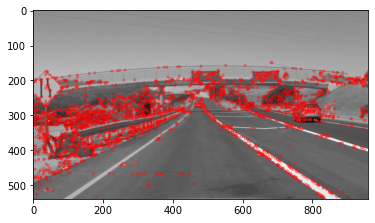

In [17]:
plt.imshow(img2)

In [18]:
## ORB

In [20]:
img2=cv2.imread('img21.jpg',0)

In [21]:
img1=cv2.imread('img22.jpg',0)

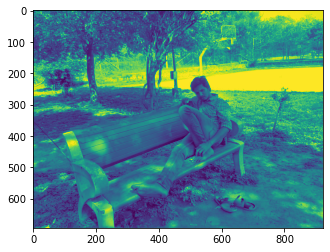

In [22]:
plt.imshow(img1)

In [23]:
def feature_extraction(image):
    orb=cv2.ORB_create()
    kp=orb.detect(image,None)
    kp,des=orb.compute(image,kp)
    return kp,des

In [ ]:
kp1,des1=feature_extraction(img1)
kp2,des2=feature_extraction(img2)

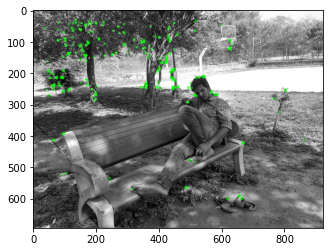

In [154]:
img3=cv2.drawKeypoints(img1,kp1,None,color=(0,255,0),flags=0)
plt.imshow(img3)

In [155]:
img4=cv2.drawKeypoints(img2,kp2,None,color=(255,0,0),flags=0)

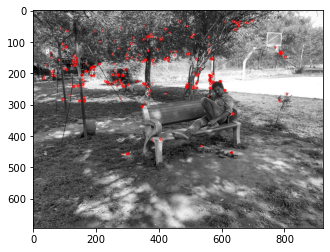

In [156]:
plt.imshow(img4)

## Matching Features

### 1: BruteForce Feature Matching

In [157]:
def match_features(des1,des2):
    #Brute Force method
    BF_match=cv2.BFMatcher_create()
    match=BF_match.match(des1,des2)
    return match

In [158]:
match=match_features(des1,des2)

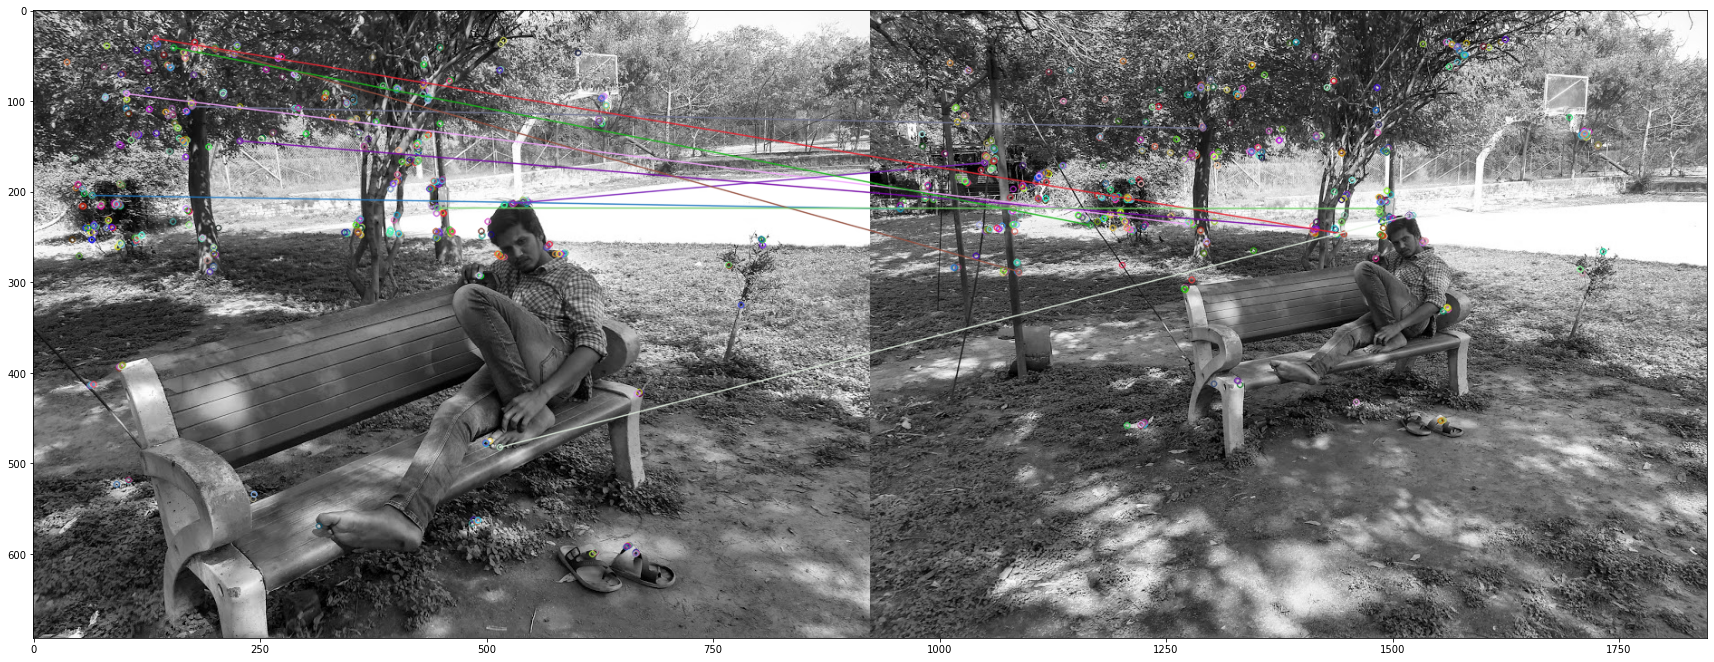

In [159]:
final_image=cv2.drawMatches(img1,kp1,img2,kp2,match[:10],None,flags=0)
plt.figure(figsize=(30,15))
plt.imshow(final_image)
plt.show()

### FLANN Feature Matching 

In [33]:
#Here we are using SURF fetureExtraction algorithm
import cv2.xfeatures2d

In [41]:
sift=cv2.SIFT_create()

In [55]:
img1=cv2.imread('exit-ramp.jpg',0)
img2=cv2.imread('exit-rampRot.jpg',0)

In [56]:
#img1_g=cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
#img2_g=cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
def feature_ext_sift(img):
    sift=cv2.SIFT_create()
    kp,des=sift.detectAndCompute(img,None)
    return kp,des

In [57]:
kp1,des1=feature_ext_sift(img1)
kp2,des2=feature_ext_sift(img2)

In [ ]:
cv2

#### disparity calculation through opencv

In [1]:
import cv2 
import matplotlib.pyplot as plt 

In [5]:
imgL=cv2.imread('stereo_imgLeft.png')

In [6]:
imgR=cv2.imread('stereo_imgRight.png')

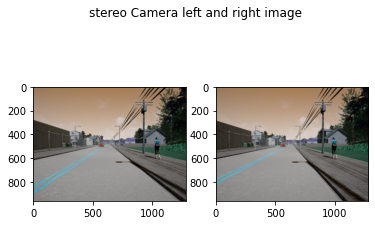

In [11]:
fig,plot=plt.subplots(1,2)
fig.suptitle('stereo Camera left and right image')
plot[0].imshow(imgL)
plot[1].imshow(imgR)


In [21]:
stereo=cv2.StereoSGBM_create(numDisparities=16,blockSize=5)

In [22]:
disparity =stereo.compute(imgL,imgR)


In [26]:
cv2.imwrite('disparity.png',disparity)
if cv2.waitKey(0) & 0xff==27:
    cv2.destroyAllWindows()

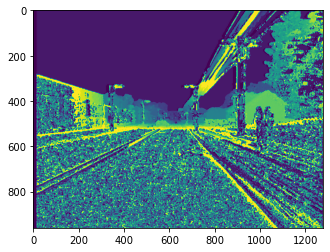

In [36]:
plt.imshow(disparity)

## Optical Flow : 

### Sparse Optical Flow :

In [5]:
import cv2 as cv
import numpy as np

# Parameters for Shi-Tomasi corner detection
feature_params = dict(maxCorners = 300, qualityLevel = 0.2, minDistance = 2, blockSize = 7)
# Parameters for Lucas-Kanade optical flow
lk_params = dict(winSize = (15,15), maxLevel = 2, criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
# The video feed is read in as a VideoCapture object
cap = cv.VideoCapture(0)
# Variable for color to draw optical flow track
color = (0, 255, 0)
# ret = a boolean return value from getting the frame, first_frame = the first frame in the entire video sequence
ret, first_frame = cap.read()
# Converts frame to grayscale because we only need the luminance channel for detecting edges - less computationally expensive
prev_gray = cv.cvtColor(first_frame, cv.COLOR_RGB2GRAY)
# Finds the strongest corners in the first frame by Shi-Tomasi method - we will track the optical flow for these corners
# https://docs.opencv.org/3.0-beta/modules/imgproc/doc/feature_detection.html#goodfeaturestotrack
prev = cv.goodFeaturesToTrack(prev_gray, mask = None, **feature_params)
# Creates an image filled with zero intensities with the same dimensions as the frame - for later drawing purposes
mask = np.zeros_like(first_frame)

while(cap.isOpened()):
    # ret = a boolean return value from getting the frame, frame = the current frame being projected in the video
    ret, frame = cap.read()
    # Converts each frame to grayscale - we previously only converted the first frame to grayscale
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Calculates sparse optical flow by Lucas-Kanade method
    # https://docs.opencv.org/3.0-beta/modules/video/doc/motion_analysis_and_object_tracking.html#calcopticalflowpyrlk
    next, status, error = cv.calcOpticalFlowPyrLK(prev_gray, gray, prev, None, **lk_params)
    # Selects good feature points for previous position
    good_old = prev[status == 1]
    # Selects good feature points for next position
    good_new = next[status == 1]
    # Draws the optical flow tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        # Returns a contiguous flattened array as (x, y) coordinates for new point
        a, b = new.ravel()
        # Returns a contiguous flattened array as (x, y) coordinates for old point
        c, d = old.ravel()
        # Draws line between new and old position with green color and 2 thickness
        mask = cv.line(mask, (a, b), (c, d), color, 2)
        # Draws filled circle (thickness of -1) at new position with green color and radius of 3
        frame = cv.circle(frame, (a, b), 3, color, -1)
    # Overlays the optical flow tracks on the original frame
    output = cv.add(frame, mask)
    # Updates previous frame
    prev_gray = gray.copy()
    # Updates previous good feature points
    prev = good_new.reshape(-1, 1, 2)
    # Opens a new window and displays the output frame
    cv.imshow("sparse optical flow", output)
    # Frames are read by intervals of 10 milliseconds. The programs breaks out of the while loop when the user presses the 'q' key
    if cv.waitKey(10) & 0xFF == ord('q'):
        break
# The following frees up resources and closes all windows
cap.release()
cv.destroyAllWindows()

In [ ]:
import cv2 as cv
import numpy as np

# The video feed is read in as a VideoCapture object
cap = cv.VideoCapture("shibuya.mp4")
# ret = a boolean return value from getting the frame, first_frame = the first frame in the entire video sequence
ret, first_frame = cap.read()
# Converts frame to grayscale because we only need the luminance channel for detecting edges - less computationally expensive
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
# Creates an image filled with zero intensities with the same dimensions as the frame
mask = np.zeros_like(first_frame)
# Sets image saturation to maximum
mask[..., 1] = 255

while(cap.isOpened()):
    # ret = a boolean return value from getting the frame, frame = the current frame being projected in the video
    ret, frame = cap.read()
    # Opens a new window and displays the input frame
    cv.imshow("input", frame)
    # Converts each frame to grayscale - we previously only converted the first frame to grayscale
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Calculates dense optical flow by Farneback method
    # https://docs.opencv.org/3.0-beta/modules/video/doc/motion_analysis_and_object_tracking.html#calcopticalflowfarneback
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
    # Sets image hue according to the optical flow direction
    mask[..., 0] = angle * 180 / np.pi / 2
    # Sets image value according to the optical flow magnitude (normalized)
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
    # Converts HSV to RGB (BGR) color representation
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
    # Opens a new window and displays the output frame
    cv.imshow("dense optical flow", rgb)
    # Updates previous frame
    prev_gray = gray
    # Frames are read by intervals of 1 millisecond. The programs breaks out of the while loop when the user presses the 'q' key
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
# The following frees up resources and closes all windows
cap.release()
cv.destroyAllWindows()